this notebook tries to visualize some models examined in `basic_for_certain_configs_cc2normed.ipynb`. I will check those with biggest ccnorm2 difference between unroll=1 and unroll=5. I will ignore the middle ones, and see hope to see some visible differences.

the models are exported using `scripts/model_export/yuanyuan_8k_a_3day/maskcnn_polished_with_local_pcn/export_certain_configs.py` and verified with `scripts/model_export/yuanyuan_8k_a_3day/maskcnn_polished_with_local_pcn/export_certain_configs_check_keras.py`.

the visualization follows `https://github.com/leelabcnbc/tang_jcompneuro_revision/blob/master/results_ipynb/plots/main/demo_neuron_vis.ipynb`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sys import path
from copy import deepcopy
from collections import defaultdict
from os.path import join, exists
from thesis_v2 import dir_dict
import numpy as np
folder_to_check = 'scripts/training/yuanyuan_8k_a_3day/maskcnn_polished_with_local_pcn'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit_certain_configs import param_iterator_obj
from key_utils import keygen, script_keygen

In [3]:
# compute ccmax
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial


cc_max_all_neurons = cc_max(get_neural_data_per_trial(
    ('042318', '043018','051018',))
                           )
assert cc_max_all_neurons.shape == (79,)

In [4]:
# then let's check the avg(ccnorm2 at unroll=5) - avg(ccnorm2 at unroll=1) for all cases.

In [5]:
from thesis_v2.training.training_aux import load_training_results

constant_params = {
    'out_channel': 16,
    'num_layer': 2,
    'kernel_size_l1': 9,
    'pooling_ksize': 3,
    'pooling_type': 'avg',
    'split_seed': 'legacy',
    'smoothness_name': '0.000005',
    'scale_name': '0.01',
    'pcn_no_act': False,
    'pcn_bias': True,
    'pcn_bypass': False,
    'bn_after_fc': False,
}

def do_one_case(param, dict_ret, dict_per_ret, total_score_sum_ret):
    for k1, v1 in constant_params.items():
        assert param[k1] == v1
    

    # assert param['model_seed'] == 0

    key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
    
    params_variable = {
        k: v for k, v in param.items() if k not in (constant_params.keys() | {'scale', 'smoothness'})
    }
    # 128 (configs; 7**2) * 3 (seeds) * 6 (number of cycles from 0-5)
    assert len(params_variable) == 9
#     print(params_variable)
    
    key_for_result_dict = frozenset({(k,v) for k, v in params_variable.items() if k not in {'model_seed', 'pcn_cls'}})
    assert len(key_for_result_dict) == 7
    
    # load the performance.
    result = load_training_results(key, return_model=False)
    
    
    
    if key_for_result_dict not in dict_ret:
        assert key_for_result_dict not in dict_per_ret
        dict_ret[key_for_result_dict] = defaultdict(list)
        dict_per_ret[key_for_result_dict] = defaultdict(list)
    else:
        assert key_for_result_dict in dict_per_ret
        
    # calculate ccnorm^2.
    cc_raw = np.asarray(result['stats_best']['stats']['test']['corr'])
    assert cc_raw.shape == (79,)
    
    ccnorm2_per = (cc_raw/cc_max_all_neurons)**2
    
    ccnorm2 = ccnorm2_per.mean()
    assert(np.isfinite(ccnorm2))
    
    total_score_sum_ret += ccnorm2_per
    
    dict_ret[key_for_result_dict][params_variable['pcn_cls']].append(ccnorm2)
    
    dict_per_ret[key_for_result_dict][params_variable['pcn_cls']].append(ccnorm2_per)
    

In [6]:
def collect_data():
    dict_ret = dict()
    dict_per_ret = dict()
    
    # check which neurons get explained best.
    total_score_sum_ret = np.zeros((79,), dtype=np.float64)
    
    model_count = len(list(param_iterator_obj.generate()))
    # this should be 2304, which is 128 (configs) * 3 (seeds) * 6 (number of cycles from 0-5)
    assert model_count == 2304
    for idx, param_dict in enumerate(param_iterator_obj.generate()):
        if idx % 100 == 0:
            print(f'model {idx}/{model_count}')
        do_one_case(param_dict, dict_ret, dict_per_ret, total_score_sum_ret)
    return dict_ret, dict_per_ret, total_score_sum_ret

In [7]:
dict_all_ccnorm2, dict_all_ccnorm2_per, total_score_sum = collect_data()

model 0/2304
model 100/2304
model 200/2304
model 300/2304
model 400/2304
model 500/2304
model 600/2304
model 700/2304
model 800/2304
model 900/2304
model 1000/2304
model 1100/2304
model 1200/2304
model 1300/2304
model 1400/2304
model 1500/2304
model 1600/2304
model 1700/2304
model 1800/2304
model 1900/2304
model 2000/2304
model 2100/2304
model 2200/2304
model 2300/2304


In [8]:
total_score_sum

array([ 836.95909272, 1152.52967484, 1639.31508265, 1735.05343238,
        961.10626989, 1563.02509191, 1259.26758254, 1291.80996435,
       1982.39294608, 1872.81523323, 1658.3558144 , 1502.116723  ,
       1605.08592628, 1944.57127765, 1273.38992206, 1582.82273158,
       1643.51679732, 1472.76843554, 1704.45591695, 1550.33632946,
       1348.9774516 , 1442.64209704,  583.32556926,   44.70840961,
       1743.06689178, 1277.96704016, 1727.56175865,  647.63125799,
       1628.49192991, 1646.04051438,  964.08039286, 1430.52740609,
       1078.68453324, 1276.19192103, 1927.14120067, 1921.91414549,
       1417.07427395, 1501.42633597, 1437.00126277, 1682.75279821,
       1256.32794453, 1468.99641398, 1372.69750559, 1064.24270239,
       1515.73560599, 1711.52595456, 1510.86296362,  765.38788305,
        856.50625209,  209.3619508 , 1134.03341174, 1407.3352393 ,
        866.59491226, 1661.36316848, 1239.98179744,  652.70147181,
       1848.19471273, 1164.91671855, 1257.18268342, 1157.49249

In [9]:
neurons_to_check_global = np.argsort(total_score_sum)[::-1][:5]
print(neurons_to_check_global)

[ 8 13 34 61 35]


In [16]:
def show_diff_every_key(dict_ret, dict_per_ret, neurons_to_check_this_one_dict_ret):
    for key, value in dict_ret.items():
        if np.mean(value[5])-np.mean(value[1]) >= 0.02:
            print(tuple(key), np.mean(value[5])-np.mean(value[1]), np.mean(value[5])-np.mean(value[0]),
                 np.mean(value[5]), np.mean(value[0]))
            # per neuron 
            ccnorm2_5 = np.asarray(dict_per_ret[key][5]).mean(axis=0)
            ccnorm2_1 = np.asarray(dict_per_ret[key][1]).mean(axis=0)
            ccnorm2_0 = np.asarray(dict_per_ret[key][0]).mean(axis=0)
            
            assert ccnorm2_5.shape == ccnorm2_1.shape == ccnorm2_0.shape == (79,)
            print(neurons_to_check_global, cc_max_all_neurons[neurons_to_check_global])
            print(5, 'global', ccnorm2_5[neurons_to_check_global])
            print(1, 'global', ccnorm2_1[neurons_to_check_global])
            print(0, 'global', ccnorm2_0[neurons_to_check_global])
            
            
            diff_5_1 = ccnorm2_5 - ccnorm2_1
            diff_5_0 = ccnorm2_5 - ccnorm2_0
            
            neurons_to_check_this_one = np.argsort(diff_5_1 + diff_5_0)[::-1][:5]
            
            print(neurons_to_check_this_one, cc_max_all_neurons[neurons_to_check_this_one])
            print(5, 'this', ccnorm2_5[neurons_to_check_this_one])
            print(1, 'this', ccnorm2_1[neurons_to_check_this_one])
            print(0, 'this', ccnorm2_0[neurons_to_check_this_one])
            
            print('\n'*5)
            
            neurons_to_check_this_one_dict_ret[key] = neurons_to_check_this_one.tolist()

neurons_to_check_this_one_dict = dict()
show_diff_every_key(dict_all_ccnorm2, dict_all_ccnorm2_per, neurons_to_check_this_one_dict)

(('loss_type', 'mse'), ('input_size', 100), ('pcn_bn_post', False), ('act_fn', 'relu'), ('pcn_final_act', True), ('bn_before_act', True), ('pcn_bn', False)) 0.027412399616660088 -0.016090200536684918 0.3849583976488696 0.4010485981855545
[ 8 13 34 61 35] [0.7191662  0.72393955 0.68305467 0.67484534 0.59418307]
5 global [0.76380007 0.75875618 0.67107473 0.69352233 0.66893853]
1 global [0.75828146 0.62059814 0.65491702 0.68151317 0.65805148]
0 global [0.79327711 0.80374036 0.69093099 0.7409646  0.70592522]
[16 47 72 42 65] [0.81452706 0.58991838 0.58698833 0.57428142 0.46844836]
5 this [0.55005283 0.23321187 0.32593891 0.37955838 0.63890086]
1 this [0.40994797 0.11871506 0.23054855 0.2930588  0.46035682]
0 this [0.39490071 0.14607593 0.24520862 0.32638073 0.69944263]






(('loss_type', 'mse'), ('input_size', 100), ('pcn_bn_post', False), ('pcn_final_act', False), ('act_fn', 'relu'), ('bn_before_act', True), ('pcn_bn', False)) 0.03168640151885299 -0.028440148572544954 0.3729274277369154

In [11]:
# in these cases, the differences look big enough.
candidates_to_visualize = [
#     # 0.062192652728396414 0.03907294184369914 0.5513841263769397 0.5123111845332405
#     (('loss_type', 'poisson'), ('input_size', 50), ('pcn_bn', False), ('pcn_final_act', True), ('pcn_bn_post', False), ('act_fn', 'relu'), ('bn_before_act', True)),
#     # 0.0629323663988261 0.016065903548365235 0.5353156029314999 0.5192496993831347
#     (('pcn_final_act', False), ('input_size', 50), ('pcn_bn', False), ('loss_type', 'mse'), ('pcn_bn_post', False), ('bn_before_act', True), ('act_fn', 'softplus')),
#     # 0.04289359964839312 0.017826213557316284 0.581971909255969 0.5641456956986527
#     (('loss_type', 'poisson'), ('pcn_final_act', False), ('input_size', 50), ('pcn_bn', False), ('pcn_bn_post', False), ('bn_before_act', True), ('act_fn', 'softplus')),
    # 0.026568696278369885 0.034808706083833796 0.6656576629735268 0.630848956889693
    (('loss_type', 'poisson'), ('pcn_bn', False), ('pcn_final_act', True), ('input_size', 100), ('bn_before_act', True), ('pcn_bn_post', True), ('act_fn', 'softplus')),
]



In [12]:
from keras import backend as K
# this may not be necessary as onnx2keras handles this as well. but just to be double safe.
K.set_image_data_format('channels_first')
import onnx
from onnx2keras import onnx_to_keras

from vis.visualization import visualize_activation
from vis.utils import utils

Using TensorFlow backend.
/opt/conda/envs/leelab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/envs/leelab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/envs/leelab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/envs/leelab/lib/python3.7/site-packages/tenso

In [13]:
def visualize_one_case_inner(model_this, neurons_to_check_this_one):
    layer_idx = utils.find_layer_idx(model_this, 'output')
    
    images_all = []
    for filter_idx in neurons_to_check_global:
        np.random.seed(0)
        img = visualize_activation(model_this, layer_idx, filter_indices=filter_idx,
                                   tv_weight=0.2,lp_norm_weight=0.1,input_range=(0.0,255.0))
        h, w, c = img.shape
        assert h == w and c == 1
        img = np.broadcast_to(img, shape=(h,w,3))
        images_all.append(img)
    img_final = utils.stitch_images(images_all, cols=5, margin=5)
    img_final = np.pad(img_final, [(5,5),(5,5),(0,0)], mode='constant')
    print(img_final.min(), img_final.max())
    plt.close('all')
    plt.imshow(img_final/255)
    plt.show()
    
    
    images_all = []
    for filter_idx in neurons_to_check_this_one:
        np.random.seed(0)
        img = visualize_activation(model_this, layer_idx, filter_indices=filter_idx,
                                   tv_weight=0.2,lp_norm_weight=0.1,input_range=(0.0,255.0))
        h, w, c = img.shape
        assert h == w and c == 1
        img = np.broadcast_to(img, shape=(h,w,3))
        images_all.append(img)
    img_final = utils.stitch_images(images_all, cols=5, margin=5)
    img_final = np.pad(img_final, [(5,5),(5,5),(0,0)], mode='constant')
    print(img_final.min(), img_final.max())
    plt.close('all')
    plt.imshow(img_final/255)
    plt.show()

(('input_size', 100), ('pcn_bn_post', True), ('act_fn', 'softplus'), ('pcn_final_act', True), ('bn_before_act', True), ('loss_type', 'poisson'), ('pcn_bn', False)) [72, 54, 40, 62, 66]
cls 0, seed 0


Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

0.0 255.0


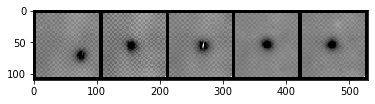

0.0 255.0


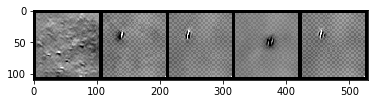

cls 0, seed 1


Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.


0.0 255.0


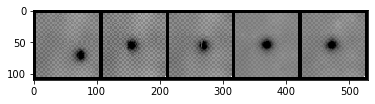

0.0 255.0


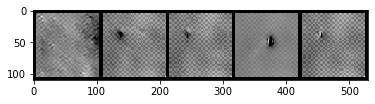

cls 0, seed 2


Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.


0.0 255.0


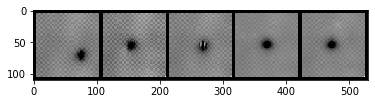

0.0 255.0


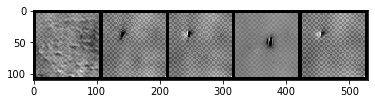

cls 1, seed 0


Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.


0.0 255.0


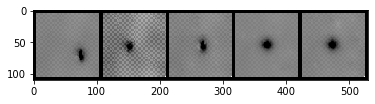

0.0 255.0


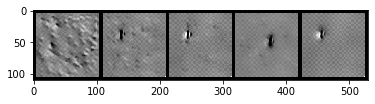

cls 1, seed 1


Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.


0.0 255.0


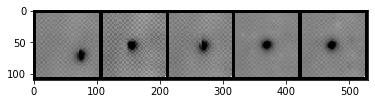

0.0 255.0


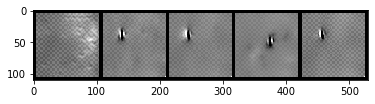

cls 1, seed 2


Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.


0.0 255.0


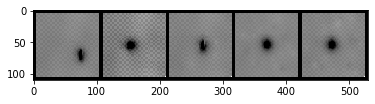

0.0 255.0


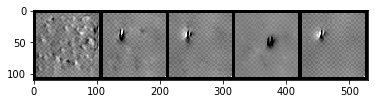

cls 5, seed 0


Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.


0.0 255.0


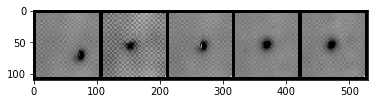

0.0 255.0


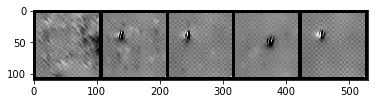

cls 5, seed 1


Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.


0.0 255.0


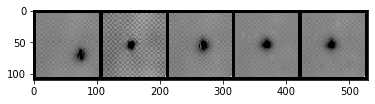

0.0 255.0


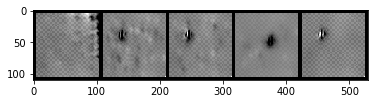

cls 5, seed 2


Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.


0.0 255.0


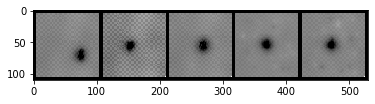

0.0 255.0


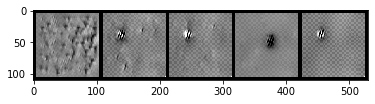

In [14]:
def visualize_one_case(key_for_result_dict):
    # show cls=0, 1, 5
    neurons_to_check_this_one = neurons_to_check_this_one_dict[key_for_result_dict]
    print(tuple(key_for_result_dict), neurons_to_check_this_one)
    for cls_to_check in (0, 1, 5):
        # for each one, show model_seed=0,1,2
        for model_seed in range(3):
            param_dict = {
                **constant_params, **{k: v for (k, v) in key_for_result_dict},
                **{'pcn_cls': cls_to_check, 'model_seed': model_seed}
            }
            print(f'cls {cls_to_check}, seed {model_seed}')
            
            # do the visualization.
            
            # load model
            key = keygen(**param_dict)
            model_loc = join(dir_dict['models'], 'onnx_export', key, 'model.onnx')
            k_model = onnx_to_keras(onnx.load(model_loc), ['input'], verbose=False)
            
            visualize_one_case_inner(k_model, neurons_to_check_this_one)

def visualize_all_cases():
    for cand in candidates_to_visualize:
        visualize_one_case(frozenset(cand))
        
visualize_all_cases()